# **Import Data**

In [9]:
import pandas as pd

# Import data
legit = pd.read_csv("datasets/URL/Benign_list_big_final.csv")
phishing = pd.read_csv("datasets/URL/phishing_dataset.csv")
malware = pd.read_csv("datasets/URL/Malware_dataset.csv")
spam = pd.read_csv("datasets/URL/spam_dataset.csv")

In [10]:
legit.columns = ['url']
phishing.columns = ['url']
malware.columns = ['url']
spam.columns = ['url']

malicious = pd.concat([phishing, malware, spam])

# **Prepare Data**

In [11]:
# Check null values
print(f"Legit null values: {legit.isnull().sum()}")
print()
print(f"Malicious null values: {malicious.isnull().sum()}")

Legit null values: url    0
dtype: int64

Malicious null values: url    0
dtype: int64


In [12]:
# Drop duplicates
print(f"Legit's duplicates num: {legit.duplicated().sum()}")
print(f"Malicious duplicates num: {malicious.duplicated().sum()}")
legit = legit.drop_duplicates()
malicious = malicious.drop_duplicates()

print(legit.shape)
print(malicious.shape)

print(f"Legit's duplicates num: {legit.duplicated().sum()}")
print(f"Malicious duplicates num: {malicious.duplicated().sum()}")

Legit's duplicates num: 0
Malicious duplicates num: 8962
(35377, 1)
(24566, 1)
Legit's duplicates num: 0
Malicious duplicates num: 0


In [13]:
# add a 'label' column to the dataframes
legit["label"] = 0
malicious["label"] = 1

In [14]:
# combine the two dataframes
df = pd.concat([legit, malicious], ignore_index=True)

# shuffle the dataframe's rows randomly
df = df.sample(frac=1, random_state=42) # Set random_state to an integer for reproducibility
df.reset_index(drop=True, inplace=True)

print(df.shape)

(59943, 2)


In [15]:
# print the counts for each category
counts = df["label"].value_counts()
print(counts)

label
0    35377
1    24566
Name: count, dtype: int64


In [16]:
print(df.isnull().sum())
print(df.duplicated().sum())

url      0
label    0
dtype: int64
0


# **Extracting Features**

In [17]:
# importing required packages for this section
from urllib.parse import urlparse
import ipaddress
import re

# 1.Domain of the URL (Domain) 
def getDomain(url):  
    domain = urlparse(url).netloc
    if re.match(r"^www.",domain):
            domain = domain.replace("www.","")
    return domain

# 2.Checks for IP address in URL (Have_IP)
def havingIP(url):
    try:
        ipaddress.ip_address(url)
        ip = 1
    except:
        ip = 0
    return ip

# 3.Checks the presence of @ in URL (Have_At)
def haveAtSign(url):
    if "@" in url:
        at = 1
    else:
        at = 0    
    return at

# 4.Finding the length of URL and categorizing (URL_Length)
def getLength(url):
    if len(url) < 54:
        return 1
    else:
        return 0

# 5.Gives number of '/' in URL (URL_Depth)
def getDepth(url):
    s = urlparse(url).path.split('/')
    depth = 0
    for j in range(len(s)):
        if len(s[j]) != 0:
            depth = depth+1
    return depth

# 6.Checking for redirection '//' in the url (Redirection)
def redirection(url):
    pos = url.rfind('//')
    if pos > 6:
        if pos > 7:
            return 1
        else:
            return 0
    else:
        return 0

# 7.Existence of “HTTPS” Token in the Domain Part of the URL (https_Domain)
def httpDomain(url):
    domain = urlparse(url).netloc
    if 'https' in domain:
        return 1
    else:
        return 0
    


def featureExtraction(url,label):
    
    features = []
    features.append(url)
    #Address bar based features (10)
    features.append(getDomain(url))
    features.append(havingIP(url))
    features.append(haveAtSign(url))
    features.append(getLength(url))
    features.append(getDepth(url))
    features.append(redirection(url))
    features.append(httpDomain(url))
    features.append(label)

    return features

In [19]:
features = []

for i in range(len(df)):
    url = df['url'][i]
    label = df['label'][i]

    features.append(featureExtraction(url,label))

In [20]:
feature_names = ['url', 'Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection','https_Domain', 'label']

df = pd.DataFrame(features, columns= feature_names)
df.head()

,url,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,label
0,http://www.dagenhamunitedfc.co.uk/media/editor...,dagenhamunitedfc.co.uk,0,0,0,5,0,0,1
1,https://medium.com/human-parts/i-was-diagnosed...,medium.com,0,0,0,2,0,0,0
2,http://adservers.co.uk/scr/clk.aspx?ec=o03Ct0J...,adservers.co.uk,0,0,0,2,0,0,1
3,http://venturebeat.com/2015/01/29/facebook-inv...,venturebeat.com,0,0,0,4,0,0,0
4,http://www.hydro-jamet.big.net.pl/electron/qpy...,hydro-jamet.big.net.pl,0,0,0,2,0,0,1


# **EDA**

<Axes: xlabel='https_Domain', ylabel='count'>

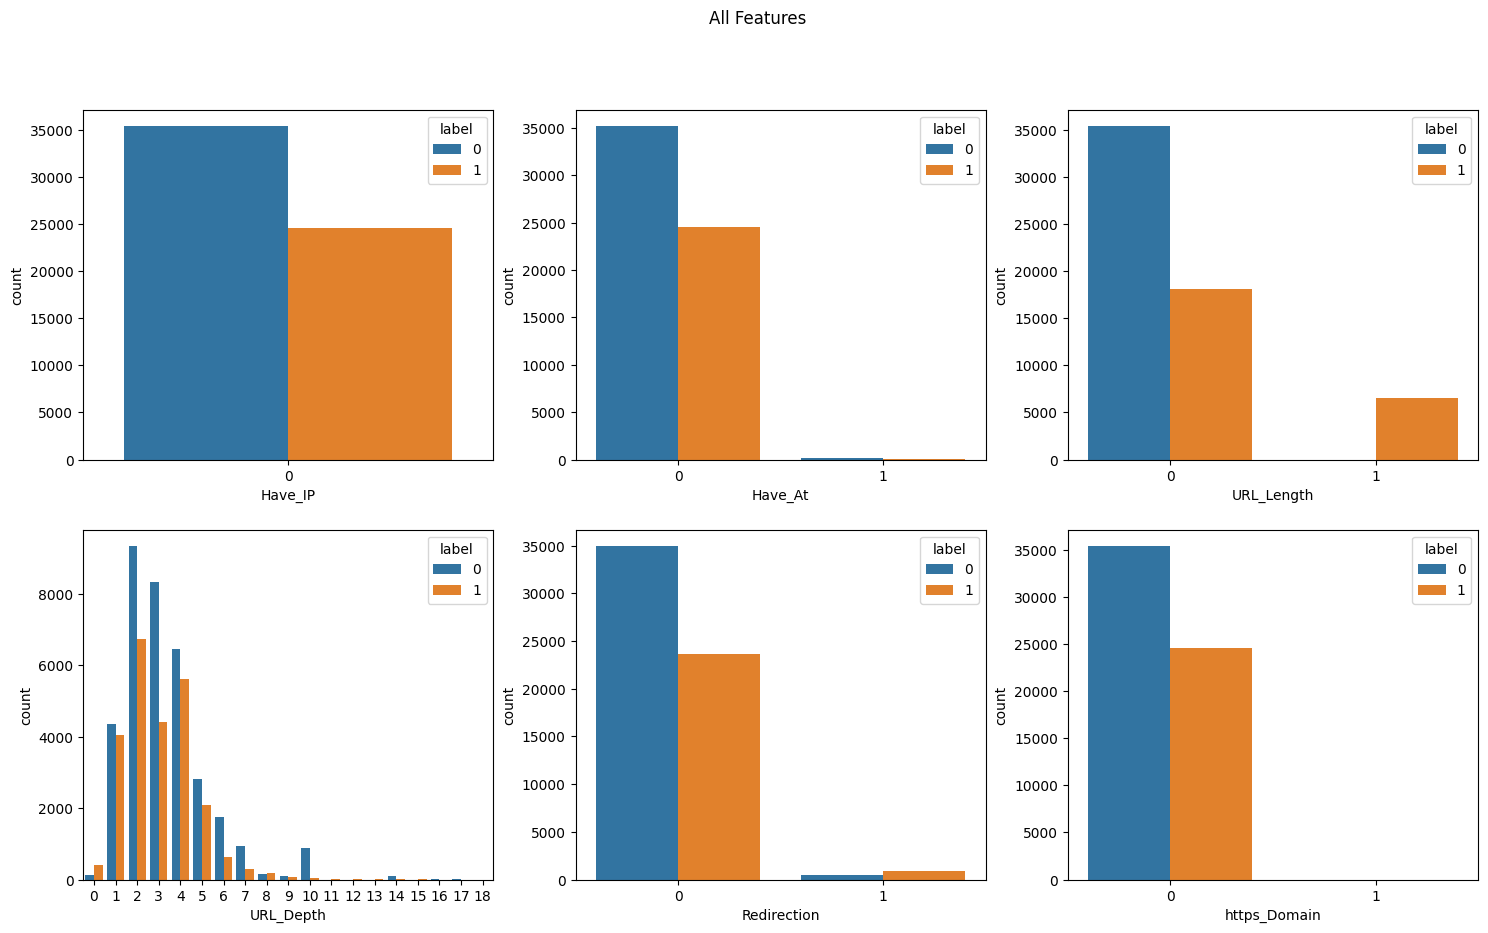

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('All Features')

iris = sns.load_dataset("iris")

sns.countplot(ax=axes[0, 0], data=df, x="Have_IP", hue="label")
sns.countplot(ax=axes[0, 1], data=df, x="Have_At", hue="label")
sns.countplot(ax=axes[0, 2], data=df, x="URL_Length", hue="label")
sns.countplot(ax=axes[1, 0], data=df, x="URL_Depth", hue="label")
sns.countplot(ax=axes[1, 1], data=df, x="Redirection", hue="label")
sns.countplot(ax=axes[1, 2], data=df, x="https_Domain", hue="label")